# Analysis of US Coastguard GPS disruption data

In [1]:
import pandas as pd

In [2]:
gps_disruption_df=pd.read_csv('gps_navcen.csv').drop('Unnamed: 0',axis=1)

In [3]:
gps_disruption_df.head()

,Disruption Date/Time,Location,Type,Description,Cause,Closed Date
0,05/18/20222100 UTC,Port Said - Egypt - Outside Channel,NaN,User: Vessel has 2 DGPS/ and experienced GPS J...,Unknown Interference,05/25/2022
1,05/15/202208:00 CET,Belgrade,NaN,USER: After 35th Belgrade marathon many users ...,Insufficient Information,05/25/2022
2,05/13/20220653 UTC,Near Suez Canal,Marine,USER: Interference occurred until entering Sue...,Unknown Interference,05/25/2022
3,05/08/20221400 (Arabic) Egypt Standard Time (+...,juaymah Terminal,Marine,USER: Intermittent loss of signal on 3 x GPS u...,Unknown Interference,05/25/2022
4,05/05/20225:38:07 CST,Sandia Crest ALBUQUERQUE,Communications,USER: issue is intermittent affecting the foll...,GPS Testing,05/25/2022


## Analyse disruptions by date

In [8]:
gps_disruption_df['local_date']=gps_disruption_df['Disruption Date/Time']\
.apply(lambda x:x[6:10]+'-'+x[0:2]+'-'+x[3:5])

local_date
2017-07-29    2
2017-09-25    2
2018-01-01    2
2018-03-21    2
2018-05-10    2
2018-05-18    2
2018-06-15    2
2018-06-28    2
2018-07-04    2
2018-10-08    2
2018-11-01    2
2018-11-10    2
2019-04-15    2
2019-05-06    2
2019-05-15    2
2019-06-12    2
2019-06-20    2
2019-08-12    2
2019-08-18    3
2019-09-02    2
2019-10-14    2
2019-10-15    2
2019-10-22    2
2020-01-01    2
2020-07-30    2
2020-09-25    3
2020-11-15    2
2021-01-16    2
2021-01-22    2
2021-02-10    2
2021-05-02    2
2021-05-24    2
2021-06-04    2
2021-07-02    2
2021-07-28    2
2021-11-04    2
2021-11-05    2
2022-04-12    2
Name: Disruption Date/Time, dtype: int64

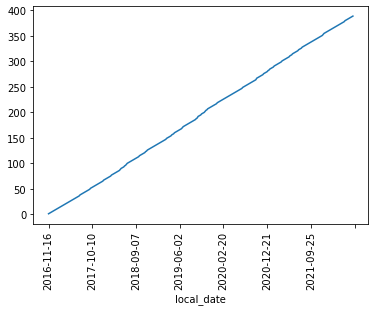

In [9]:
date_counts=gps_disruption_df.groupby('local_date').count()['Disruption Date/Time']
date_counts.cumsum().sort_index().plot(rot=90)#.to_timestamp()#
date_counts[date_counts>1]

## Analyse disruptions by location

In [10]:
gps_disruption_df['location_clean']=gps_disruption_df['Location'].\
apply(lambda x:x.split(',')[-1].strip().upper())
gps_disruption_df['location_clean_group_len']=gps_disruption_df['location_clean']\
.apply(lambda x: len(x))
gps_disruption_df['location_clean2']=gps_disruption_df['location_clean']


In [11]:
gps_disruption_df[gps_disruption_df['location_clean_group_len']==2]['location_clean'].unique()

array(['OR', 'AR', 'ND', 'UK', 'VA', 'WA', 'CA', 'MA', 'TX', 'NM', 'IA',
       'CO', 'FL', 'CT', 'NV', 'MD', 'AZ', 'NC', 'IN', 'NY', 'TN', 'OH',
       'PA', 'AK', 'GA', 'NJ', 'SC', 'OK', 'LA'], dtype=object)

In [12]:
gps_disruption_df

,Disruption Date/Time,Location,Type,Description,Cause,Closed Date,local_date,location_clean,location_clean_group_len,location_clean2
0,05/18/20222100 UTC,Port Said - Egypt - Outside Channel,NaN,User: Vessel has 2 DGPS/ and experienced GPS J...,Unknown Interference,05/25/2022,2022-05-18,PORT SAID - EGYPT - OUTSIDE CHANNEL,35,PORT SAID - EGYPT - OUTSIDE CHANNEL
1,05/15/202208:00 CET,Belgrade,NaN,USER: After 35th Belgrade marathon many users ...,Insufficient Information,05/25/2022,2022-05-15,BELGRADE,8,BELGRADE
2,05/13/20220653 UTC,Near Suez Canal,Marine,USER: Interference occurred until entering Sue...,Unknown Interference,05/25/2022,2022-05-13,NEAR SUEZ CANAL,15,NEAR SUEZ CANAL
3,05/08/20221400 (Arabic) Egypt Standard Time (+...,juaymah Terminal,Marine,USER: Intermittent loss of signal on 3 x GPS u...,Unknown Interference,05/25/2022,2022-05-08,JUAYMAH TERMINAL,16,JUAYMAH TERMINAL
4,05/05/20225:38:07 CST,Sandia Crest ALBUQUERQUE,Communications,USER: issue is intermittent affecting the foll...,GPS Testing,05/25/2022,2022-05-05,SANDIA CREST ALBUQUERQUE,24,SANDIA CREST ALBUQUERQUE
...,...,...,...,...,...,...,...,...,...,...
384,01/05/20174:35 UTC,Chile,Law Enforcement,User: There were large spikes in geozone alarm...,User Equipment,05/20/2019,2017-01-05,CHILE,5,CHILE
385,01/03/201711:AM CST,San Angelo Airport,Aviation,User: The GPS systems in normal mode not milit...,Unintentional Interference,05/20/2019,2017-01-03,SAN ANGELO AIRPORT,18,SAN ANGELO AIRPORT
386,01/02/20173:00 EST,North Carolina - South Carolina border,Transportation,User: GPS would say when you plug in that ther...,User Equipment,05/20/2019,2017-01-02,NORTH CAROLINA - SOUTH CAROLINA BORDER,38,NORTH CAROLINA - SOUTH CAROLINA BORDER
387,01/01/201712:00 EST,"Elizabeth, NJ",Transportation,"User: My business is located in Elizabeth, NJ....",Mapping Issue,05/20/2019,2017-01-01,NJ,2,NJ


In [13]:
disruptions_by_location=gps_disruption_df[gps_disruption_df['location_clean_group_len']!=2].groupby('location_clean2').count()['Disruption Date/Time']


In [14]:
disruptions_by_location[disruptions_by_location>1]#.plot(kind='barh')

location_clean2
ALABAMA                    2
ALASKA                     2
AT SEA                     2
BRAZIL                     5
CALIFORNIA                 3
CHINA                      4
CYPRUS                     6
EAST MEDITERRANEAN SEA     2
EAST OF MALTA              3
EASTERN MEDITERRANEAN      2
EGYPT                     23
FINLAND                    2
FLORIDA                    4
GERMANY                    3
GLOBAL                     4
GREECE                     3
INDIA                      2
IRAN                       2
ISRAEL                     3
ISTANBUL                   2
ITALY                      6
LEBANON                    4
LIBYA                      3
LIMASSOL                   9
MEDITERRANEAN SEA          2
NEW YORK                   2
OREGON                     2
PRC                        2
SAUDI ARABIA               3
SPAIN                      3
SUEZ CANAL                 2
TEXAS                      2
TURKEY                     2
UNITED STATES              

In [15]:
gps_disruption_df.query('Location in ("Worldwide","Global","At sea")')[['local_date','Location','Description']]

,local_date,Location,Description
61,2021-07-28,At sea,USER: The vessel was sailing towards port said...
108,2021-01-16,Global,CNES has detected a repetition of IODE for PRN...
139,2020-08-04,Global,User: CNES (Centre National d Etudes Spatiales...
165,2020-02-12,Worldwide,"User: In February 2020 (Feb 12th, 13th, 15th a..."
256,2019-02-01,Global,User: Thanks to Navigation and Timing Monitori...
326,2017-11-30,Global,User: GPS PRN22 orbit error started to wander ...
342,2017-09-20,Worldwide,User: It appears that the Subframe-2 IODC mess...


<AxesSubplot:ylabel='location_clean2'>

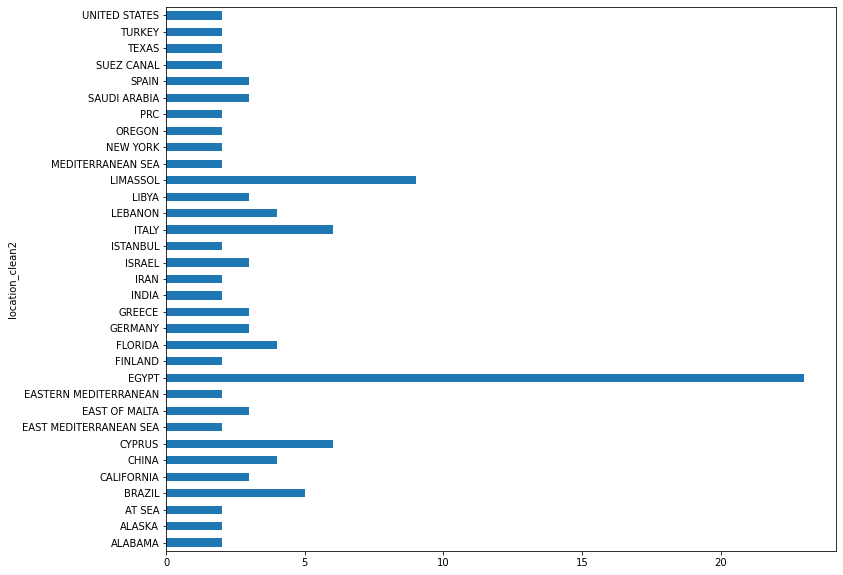

In [16]:
disruptions_by_location[disruptions_by_location>1 ].drop(['WORLDWIDE','GLOBAL'])\
.plot(kind='barh',figsize=[12,10])